In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# JCVI-Syn3.0 DNA Designs for Synthesis

Our initial synthesis order from Twist will be all of the JCVI-Syn3.0 gene designs from the Stanford BIOE 80, Introduction to Bioengineering, class. We will clone the genes into a standard vector designed by Keoni.

In [257]:
# Read in the JCVI-Syn3.0 supplementary database and pull out the genes used in Syn3.0
jcvi_genes = pd.read_csv('./aad6253-Hutchison-SM-database-S1.csv', skiprows=[0])
syn3_genes = pd.concat([jcvi_genes[jcvi_genes['KD_S3'] == 'k'], jcvi_genes[jcvi_genes['KD_S3'] == 'r']])

# Read in our designed genes from BIOE 80
design_genes = pd.read_csv('./bioe80-designed-genes.csv', names=['Gene', 'Sequence'], skiprows=[0]).dropna()

In [258]:
# How many duplicate designs do we have? (Some students were assigned the same genes)
(design_genes['Gene'].value_counts() > 1).sum()

54

In [259]:
# Where we have duplicates, pick the first design
design_genes = design_genes.drop_duplicates(['Gene'])

In [260]:
# Some genes weren't designed in our set: find those and add them to the list
# Ignore RNA genes for now

new_genes = syn3_genes.ix[~syn3_genes['Locus'].isin(design_genes['Gene'])]
new_genes = new_genes.ix[new_genes['ProteinSequence'] != 'xrna']

In [261]:
for i, gene in new_genes.iterrows():
    print(gene['Locus'])
    print(gene['ProteinSequence'])
    print()

MMSYN1_0444
MKYQIKDNLFKAVNQDWLEKTEIPNDRSSIGEFVELDIKNELIIKKIAKDLLKKQANNLLDDPNLINFAKFYSLTSNFELRNKNHIEPLKKYVNEILEIKNLDQLNQMYTTFVYRNYSLPINFDISNDYIDSSIKTLYLTIASHILPDKSHYQNKEVKNKFYKEFKAMTKKLLSAYFNDVKKINLIIKNTLEFDEIIANYSLSSLEKVRYNELYKPYKYEDVIKNTKYLDLNNIIKTLINKDVDQIIFTDDHFATNLDQIYNNKNLELIKSWLVVMLVVRFSKYLDEKTRTTASKYSLFISGQTKVKNKEKHALNLALDYFSTPIGLYYGQKYLGSKAKKDVENMVSHMINIYKQRLKNNTWLTSQTINKALLKLDKLGVHIGYPSEIEPFYANLITNSTNLIDTVFNFNQVINQYLFSEYKKPINKNYWSMAAYQVNAYYHPMYNHIVFPAGILQGSFYSINHSTSQNYGGIGAVIAHEISHAFDNNGANFDENGNLKMWWTDEDFDKFKQKTQKMIDLFDNKEIEFGKCNGTLTVSENIADAGGISCALQAAKLEKDYNAQEFFINWAKIWKSKYKQQTALRLLETDPHAPTELRANIQAANLEEFVDAFNINPEDKMYIDPQKRVKIW

MMSYN1_0910
MKRTWQPSKLKHARVHGFRARMATENGRKVIKARRAKGRVRLSA

MMSYN1_0081
MLINDTVVAPATNISTQAIALIRVSGSEAFLIVNKLIKDKKLEEKRGLFLRKLYFENELIDEVVLSCFVAPNSFTGENVVEIACHGGILNTNKIINILIQSGARMALRGEFSQRSFLNGKIDLIQAEGINNLIHAKNDLALKIGVANMSGSNNKAIIELKDNLLDIISRIQVSIDYPDYDDVEGSSIEDLTNLLEVINDQINKLLMRSKMAFKNSEGIKTAIIGQTNVGKSSILNALINEDKAIVTDIPGTTRDIVEGQINLENVSLNLIDTAGIRKTSDVVENL

In [262]:
# DNA for new genes, codon optimized at https://www.idtdna.com/CodonOpt for E. coli

import io

new_gene_dna = pd.read_csv(io.StringIO('''
MMSYN1_0444, ATG AAG TAT CAA ATT AAA GAC AAC CTT TTC AAG GCG GTA AAT CAA GAC TGG TTG GAA AAG ACT GAG ATT CCA AAT GAT CGC AGT AGT ATT GGT GAG TTT GTA GAA CTT GAC ATT AAA AAC GAA TTA ATC ATT AAG AAG ATC GCG AAA GAT TTA TTA AAA AAG CAG GCG AAC AAT TTA CTG GAT GAT CCT AAT TTA ATT AAT TTC GCA AAG TTC TAT AGT TTG ACC TCG AAT TTT GAA CTG CGT AAC AAA AAC CAC ATT GAA CCT TTG AAA AAA TAT GTG AAT GAA ATT CTT GAA ATC AAA AAT TTG GAC CAG TTG AAC CAA ATG TAC ACC ACG TTT GTC TAT CGT AAT TAC AGC CTT CCG ATC AAT TTT GAT ATT AGT AAC GAC TAT ATC GAT TCT TCA ATC AAG ACC TTG TAC TTG ACG ATT GCT AGT CAC ATC CTG CCT GAC AAA TCA CAC TAC CAG AAT AAG GAG GTG AAA AAC AAA TTT TAT AAA GAA TTC AAG GCT ATG ACT AAA AAA TTG TTG AGT GCA TAC TTT AAT GAT GTT AAA AAA ATT AAT CTT ATC ATC AAG AAC ACT CTT GAA TTC GAT GAA ATT ATC GCC AAT TAT AGC TTA AGC TCC CTG GAG AAA GTC CGC TAC AAT GAA CTT TAC AAG CCC TAC AAA TAT GAA GAC GTG ATC AAA AAT ACA AAG TAT CTG GAT CTG AAT AAT ATC ATT AAG ACG TTA ATC AAT AAA GAT GTC GAT CAA ATT ATT TTT ACT GAT GAC CAT TTT GCA ACT AAT TTG GAT CAG ATT TAT AAC AAC AAG AAT CTG GAA CTT ATC AAG AGT TGG TTG GTG GTA ATG TTG GTT GTG CGC TTT TCT AAA TAC TTG GAC GAA AAA ACG CGC ACG ACG GCG TCT AAG TAT TCC CTT TTC ATC AGC GGA CAG ACT AAG GTT AAG AAC AAG GAG AAA CAT GCT CTG AAT TTA GCA TTG GAT TAC TTC AGC ACT CCT ATC GGT CTG TAC TAT GGG CAA AAG TAC TTA GGC TCC AAA GCA AAG AAA GAT GTT GAG AAT ATG GTT TCA CAC ATG ATC AAC ATT TAC AAA CAG CGT CTT AAG AAC AAT ACG TGG CTT ACA TCC CAA ACT ATT AAC AAG GCG CTT CTT AAG TTA GAT AAA CTG GGA GTT CAC ATT GGA TAC CCT AGT GAG ATT GAA CCG TTT TAT GCA AAC CTT ATT ACT AAT AGT ACC AAT CTG ATC GAC ACG GTT TTT AAT TTC AAT CAA GTA ATT AAT CAA TAT TTA TTC AGT GAA TAC AAA AAA CCG ATC AAT AAA AAT TAT TGG TCT ATG GCC GCC TAC CAA GTG AAC GCC TAC TAT CAT CCT ATG TAC AAC CAC ATC GTT TTC CCC GCA GGC ATT TTG CAG GGC TCT TTT TAC TCC ATC AAT CAC AGC ACA TCA CAG AAC TAT GGC GGT ATC GGA GCG GTC ATC GCA CAC GAA ATC TCC CAT GCC TTT GAT AAC AAC GGG GCC AAT TTT GAC GAA AAT GGC AAC CTT AAG ATG TGG TGG ACC GAT GAG GAC TTC GAC AAA TTC AAA CAG AAA ACA CAG AAA ATG ATT GAT TTG TTT GAT AAC AAA GAA ATC GAA TTT GGA AAG TGC AAC GGC ACT TTA ACT GTC AGC GAG AAT ATT GCT GAT GCT GGG GGC ATT TCG TGC GCT TTG CAA GCC GCT AAA CTT GAG AAA GAC TAC AAC GCA CAA GAA TTT TTT ATT AAT TGG GCC AAA ATC TGG AAA TCA AAG TAT AAA CAG CAG ACG GCG CTT CGT TTA TTG GAG ACG GAT CCA CAC GCC CCG ACA GAG TTG CGT GCG AAT ATC CAA GCA GCA AAT TTA GAA GAA TTT GTT GAC GCA TTC AAT ATC AAT CCC GAG GAT AAG ATG TAC ATT GAT CCG CAG AAG CGC GTT AAG ATC TGG TGA
MMSYN1_0910, ATG AAA CGC ACA TGG CAG CCC TCG AAG TTA AAA CAC GCT CGC GTT CAC GGC TTC CGC GCT CGC ATG GCT ACA GAA AAC GGA CGC AAG GTT ATC AAA GCG CGT CGT GCC AAG GGG CGC GTT CGT TTA AGC GCA TGA
MMSYN1_0081, ATG TTG ATT AAC GAC ACT GTT GTA GCT CCC GCG ACC AAC ATT AGT ACA CAA GCT ATT GCG CTT ATC CGC GTT AGT GGT TCC GAG GCT TTT CTT ATC GTT AAC AAG TTG ATC AAG GAT AAA AAG TTA GAG GAG AAG CGT GGG TTA TTC TTG CGC AAA CTG TAT TTC GAA AAT GAG TTG ATT GAC GAA GTG GTA CTG TCA TGT TTC GTA GCG CCG AAT AGT TTC ACT GGA GAG AAC GTC GTA GAG ATC GCG TGC CAT GGA GGA ATC TTG AAT ACA AAT AAA ATC ATC AAC ATT CTG ATC CAG TCC GGG GCA CGT ATG GCG TTG CGC GGG GAA TTT TCG CAG CGT TCT TTT CTG AAT GGG AAA ATC GAC TTA ATT CAG GCC GAG GGA ATC AAC AAC CTT ATC CAT GCT AAG AAT GAT CTG GCT CTG AAA ATT GGC GTT GCA AAT ATG TCG GGA AGC AAT AAC AAA GCC ATC ATC GAG TTG AAA GAT AAC TTG TTA GAC ATT ATT AGC CGT ATC CAG GTA AGT ATC GAT TAC CCC GAT TAC GAC GAC GTA GAA GGT TCA TCT ATC GAG GAC CTG ACC AAC TTG CTT GAG GTA ATT AAT GAT CAG ATT AAC AAA TTA CTG ATG CGT TCG AAG ATG GCG TTT AAG AAC TCG GAA GGG ATT AAG ACC GCA ATC ATT GGG CAA ACC AAC GTC GGT AAA TCA AGC ATC TTG AAC GCC CTT ATC AAC GAA GAC AAA GCA ATT GTG ACA GAC ATT CCA GGT ACC ACC CGT GAT ATC GTT GAA GGC CAA ATT AAT CTG GAG AAC GTG TCC TTG AAC TTG ATT GAC ACA GCG GGA ATT CGC AAA ACT TCC GAC GTT GTA GAA AAT CTG GGT ATT CTT AAA AGC AAG AAT TTA ATT AAT GAG GCC GAT TTA GTG TTA TTC GTA GTC AAT AAA GAA AAC ATC AAC GAT TCT GAT AAT CAA GAG ATT TTT GAA TTG TTG AAG GAC AAA ACC TAC ATT CTG ATT GTC AAT AAG GCG GAG AAG CTT AGC CAA ACC GAG AAA CAG AAC CTT GAG AAA AAA TAC GAA AAT ATC GTT TTT ACT TCA GCC ATC AAC CAT GAC ATC GAC CAA CTG GTC TTA CGT ATT AAC CAA ATG TTT CTG AAC GAA GAA ATC AGC AAG AAC GAC GAG TTG ATT CTG ATT GGG TTA AAC CAG ATT ACA TTA GTG GAG CAG ATT AAA AAC AAG TTA TCC ACT GCA CTT TCG GTT ATC AAA TCG GGA ATG CCC ATT GAT ATT GTT AAC GTA GAT TTG TAT GAT GCT TGG AAT CTG CTT AAC GAA CTT ATC GGC GTA GAG TAC GAA GAT GAA ATC ATC GAT AAC ATT TTT CGT AAG TAC TGT CTT GGG AAA TGA
MMSYN1_0140, ATG ACG GAG CTT GAC ATC AAC GAA ATT GAA GCG TAT AAT AGT AAT AAG ATG GGT TGG ATT GAA CTG ATT ACC GGC TGC ATG TTT GCT GGA AAA ACG GAG GAG TTT ATT CGC CGT CTT CGC GTA CTT TCG TAT GCC AAG AAA CGT GTT CTG GCA TTT AAG CCA AGT ATT GAC AAC CGT TAC TCG GTG GAA AAT ATT ATC TCA CAT AGC GGC AGC AAG TTA GAC AGT TAT CTT GTA CAC TCA TCC GAC GAG ATC AAG CAA ATC ATT GAG AAA GAA AAC CAA ATT CAG CAA GTT GAT GTG ATC GGC ATT GAC GAA GTA CAA TTC TTC GAT GAA CAG GTG GTC GAA TTG ATT GAA CAG CTT GCC AAC CAG GGC ATC ATC GTG ATC GTG AAT GGA CTT GAC AAG GAT TTT CGT TGC TTG CCG TTC AAA AAT GTT GAC AAA TTA TTA GTT ACA GCA GAG TTT GTC ACA AAG CTG CGC GCT CGT TGT CAT CTT TGT GGT AAC TTC GCC AAT CGC TCC CAG CGC ATT GTG AAC GGC CAA CCT GCC TTA TGG GAT TCG CCG CTT ATC CTG GTA GAC GGT AAG GAA TCG TAT GAG GCC CGC TGT CGT AAT TGT TTC ATT GCG CCA AAA AAG GAA GTC TGA
MMSYN1_0146, ATG AAG CGC AAG ATT ATT AAG AAG AAT TTG GCT TTA GTG AAG AAG AAA CGC TTA TTT CTG GAT TTT TTG AAA AAC AAT CAG CTT GAA GAC ATC TAC CTG AAG AAC ACG GAC TTC AAC AAA AAA TCT AAC ATT TTG CTG AAT AAC TTC ATC ATT ATT TTG AAA ATT AAT AAC TTG AAC TAT AAA AAC TTC TGG GCT AAC ATT TCG TTT ATT AAT TTC TGC ATT TAC TAT TTA TAT CAC AAA TTT TAC AAG TCG CTG TCA GAA CAG AAA TTG AAC CAA ATT AAT CTG ACC ATC AAA AAA ATT GCT ACT AAC CGT AAA TAC AAC TCA TTA GAC ATT AAT TAC GAA AAA CAA CTG ATT GAG ATT GCG AAA CAA TAT GAT ATC AAA TTT TCG ACT GAC TTT ATT AAC ACG TAC TTT AAC AAC CAT CAG ATC TAC CAT TAT ATT TCC AAT TCC TTT AGC TTG ATG TTC GAA AAT GAC AAG AAG ATG TTA GCG TAT TCT TAT TGC TAC TGG CTT ATT TTA TTT ATT TAT ATT AAA AAA TAT CTG TCT CTT CAA TTA AAT TAC AAA TAC TCG TAC AGT CTT TTT AAC TTG GAG ATG ATT TGC AAC GAA AAT TAT ATT AAA AAC ATC AAA CAG TTA ACC CCA ATT TTC TTT AAT CTT TTG ATT ATG AAA AAT AAT AAG TGG ATC TCC AAG TTG GAT ATT AAG CGC AAA AAA AAA TGA
MMSYN1_0222, ATG AAA ATT AAA CTT CTT GAC GGC AGT ATC AAG GAA TAT AAC CAG GAA ATT AGC ATT AAG GAC ATT TCG TCC GAA ATC GGC CTT AAG AAT GTG ATC GGA GCT AAG ATC AAT GAC CAG CTT TTT GAC ATT AAC TAT CTG ATT AAA AAC GAC TGT GAT TTG GAG CTG ATC ACG AAC AAG TCA AAG GAG TAT GAC TTG ATG TTG AAT TTG ACC GCC GCA TTC ATT ACA AGC TAC GCG ATT AAC TCA TTC AAG TCC ATC TCT CAG GCA GAG AAT TTC TAC AAT GCT GAT GAA ATG GAG TTT TCG ACG ACG TTT GAT ACG GAA CCT CGC CTG GTG CTG GAT GAC TTG AAG AAT ATT CAG ACA AAT ATT AAT AAC CTT TTG ACT TCC AAC CTT GAG ATC AAA AGT AAC ATC TAT GAT CTG AAT AAG GCG TTG GAG ATC TTG AAC AAT GAT TAC CAG AAA CAC CTT GCC AAA CAG ATG TAC GAG AAG TAT AAC TAC GTT AAA GTA TAC TCT ATC AAT GAC TTC TAC ATG GTC ATC GAT AAA GCG CTG ATC CTT AAC AGT AAC TTC ATT AAA ATC ATT GAC ATC GAA CAA CTG ACA GGG TCG TAT TGG TTG AAC GAT AAA AAT AAC ATC ATG CTT CAA CGC GTA CAC GGA CTG TGT GCT ACC TCC TCG TCG GAG CTT AAA AAC AAG AAG GTG ATT CTT GAG GAT CGC CGC TCA CGC GAT CAT CGT CTG ATT AAT AAA ACG TTA AAT ATT TTC GGA TTC GAC CAA CTG GTG GGA GCG GGT TTA CCG CTT TGG CTT CCA AAT GGC TTT ATC GTT AAA AAT GAA ATC GAA AAG TAT TTA CGC CAA AAG GAA TGG GAG TAT GAT TAC ATC CCC GTG GAA ACC CCG CCG ATT GGG ACT GTT GAA TTA TAT AAA ACC TCC GGA CAT TGG GAT CAC TAT GGG GAA GAT ATG TTT CAA CCT TTC AAC GGC GGC AAA GGC AGT GAC GAA CAG TTC ATC TTG CGC CCC ATG AAT TGC CCT CAC CAC ATT GCG GTA TAC AAA CAG GAA CAG CGC TCG TAC CGC GAT TTG CCC TTA CGC ATC TGC GAG CAC GCA ATC CAA CAC CGC TTT GAG TCG TCA GGA AGC CTT ACT GGG CTG GAA CGT GTG CGT GGC ATG AAG CTG ACG GAT AGC CAC ATT TTC GTC CGC TCG GAT CAA ATC GAG GAT GAA TTT CGC TCA ACA TAC AAG TTG ATT AGT GAG GTC CTG AAG ACA TTC AAT ATT CAA ATT GAT TAT CTT TCT CTT AGT CTT CGC GAC CCA AAT GAT AAG GTA AAA TTT TAC AAG GAC GAT TTG ATG TGG GAC AAG GCC GAG TCC TCA TTG GAG AAA GTG CTG ATT GAC CTG GGT TTG AAA TAC GAG AAG CGT ATC GGT GAT GCG GCG TTC TAC GGG CCA AAA CTT GAC ATT CAG ATC AAA ACA GCT CAA AAC CAC GAG ATT ACG GTC TCT ACA ATT CAG TTA GAT TTC CTT ATG CCC AAC AAA TTT GAC TTG ACA TAC ATC GAC AAA GAC CAG AAG TTG GTT CGT CCG ATC ATG ATC CAT CGC GGA TTA ATT GGC ACA TAC GAA CGC TTC ATC GCC ACG TTA CTG GAA CAG ACC AAA GGG GTC TTA TCG CTG TGG CTG GCC CCC AAG CAG GTG GAA ATT ATC CCG ATC TCC GAA AGT AAT TTA GAG TAC GCC AAT CTT ATT CAT CAG AAA CTT AAG AAG GAG TTT ATC CGC TCA CAT ATC GAC CTT CGC GAC GAG CGT CTG TCT TAT AAA ATT CGT GAT GCC CAA ACC AAG AAG GTG CCT TAC CAG TTG GTC TTA GGT AAT AAA GAA GTG GAA AAT AAC ACT ATT ACG TAT CGC CAA TAT GGA AGT GAC GCT CAA ATC ACG GTG CCT ATT CAG GAA TTT ATC GAT ATG TTA AAG CAG CAG ATT AAC GAT AAA AAG TGA
MMSYN1_0439, ATG AAG AAG TTA TTA ACC ATT TTA GGA AGC ATC TTG CTT TCA GCG GGT ACG ACA ACA GTG GCT GTG GCC TGC ACA ACG AAA AAT GAT AAG TTC GAC AAG CCT TCT ATT ACT GAC GAA TTA TCA CAA AAG ATT ATT AGT GGG TTA AAG CTG TCC GAC GAT TTT AAC TTC ACT ACC GGT GAG CGT TTC TCC AAG CTG GAC TAC AAG AGT CTT ATC CTT GAT ATG ATC AAC GAA ACG ATT TCG AAG AAT AAG TAT ACA GAT AAC CTT AAC AAC CTT TCG AAA AAG TTT GGG TTG GAG ATC AAA CAA ACC AAG GAA TTA GGC GAC AAG AAA GCT GAA GAA GTG CTG AAA AAC TTG TCT ACC ATT AAG CTG TTT GCC GAT TAT ACT TCT AAA CGT GCA TCT GAA GAG AAT TCA GAT TCC ATC GAC TTG AGT TAT TCA GAA AAT TAT CCC TTA AAC CCT TAC AAT CTT GAG AGT AAG AAC GGG CAA AAA GAC CGC ACA GTT TAT GCT ATT TAC TAC AAA AAT AAT AAC AAC ACC TCT AGC TCA GGA TCG TCT TCA AAC GGC GGA GGC AGT AAC GGG GGA ACA ACA TGG TTA CGT TGG CAG ACC ACA GGA GAA TTT GAT ACC CTT AGC TCG ACG ATC CCC TCT ACA CCT CAA TTG CCT TCA GTC AGT CTG CTG ACC GAC ACG TCG ACT AAG AAC TTC CGT ATT GCT AAG CTT AGC AAA CCG ACA GAA CAA GAC TAT ATT ACA AAG ACA GCA TCA GTA AAC GAC GAC GGT AAG GCA ACC AAT AAT GGG GGC AAC GAA TCT GTA GAG TGG TAT AAA AAT AGC AAC GAT AAA TTT GAA ACA GAC GGA CAA GGT ATT ATG CAG TAT CGC TTT ATG TAT CAT TTC AAG ACC AAA ATT GAA GCT AAA TTG TTT AAT GAC CTG CTT GGA CAT GCC TAC ATT GAT AGT AAC CTT TTT GTC GAC AAA AAT GAT AAT AAA AGT GCC TCG AAT AAA AAA ATT ATC CTT AAC AAT GTG TCA AAG TTG ATC TCA GAC ATT CAA TCT AAT TAC AGT CAA GTA GAC AAA ACG ATT AGC AAT GTA AAG ATG GTT TGG GCC TTT TCC CTT GAC AAG CAA AAG GTG AGT GAA GTA AAC GCT GAA ATT AAT CAA TAC GTT AAT CCC GAC GGC TCC TTG ATC AAC AAG GAT AAT AAG AAA ACC CTG AAA AAC GTG TTT GAT AAA ATC AAG TCG AAG ACT AAC AAC GAG TCT AAA CAG GGA ACA GAT TCA CTT TTG TCC ATT TCT GGT TTT AAT GGC TTC GTC AAG AAT AAA GAC AAT AAC ATT GAA AGC TTA TCG GGA GAT CTG AAA ATC ACA GAG GAA GCT AAA AAG GCA GTT GCT CGC GTA AAT GCT CCT AGT CTG TTG ACC AAC AAT AAT AAC GGA TTT ACT AGT GAA AAT AGT AAT AAC GTG GAT TAC GTT TTT GTA CTG CCG ATT TAT TTG AAT GAC TTG TTC AGT AGT AAT GAT ATG CAG ATC AAG CGT AAT ACG GGC TCG AAT GGA GGA GCA GGG TCT AAT GGT AGC AAC TAT GAA TTG AAT GTT ATG CAG AAC ACA TGG GTG AAT TTG AAC GAC AAG TTC TCG TTA GAC AAC CGT TAC TTC GAT AAC TTA ACA ATC AAG AAG GTG GAA AGT AAA GAC AAC GGT GAA GCC CTT GTC GCC AAT AAC AAC GAT AAG TGG TAT GTC AGT CTT AAA AAT GGG AGT GAC TCC AAA AAA GTG GAA GTG ACA TAC TCA GAT AAT TCT AAA AAA ATG ATC ACA CTT AAA AAA GCA GAT CCG AAT AAT ATC AAA ACC CTG GAT TTC ACT TAT AAG TTG TCG AAC TCT GAT TTT AAT AAA CAA CTG TTC AAA GAC AAA TTG AAG GAC TCC TTT ATT AGC TAC GAC ATT AAC TTG AAG AAT TAC GAT AAC ATT AAG GAC AAG CAA AAT GAT GCA TAT ATT TGG AAC AAC GAT CCT AAA AAG AGT AAC GAC ATC CAG GAG TTA AGT GCA GCT AAA AAG CAG GTG TTG CTG GAC CAG CTT GAG GCC ATC ACC GCC AAA AAC CCC GAC GTT CAA AAC GCG GCC AAA ACC GAA CTT TAT TCG GCA TAT TTA TAT ACA GAC GGG ATC TAT TAC AAA TCG TTG TTC GAT GAG ATC AGC AAA TAC ATC GAG TCT GAA AAG CCA ACG CTG GAT TGA
MMSYN1_0441, ATG AAT GAT CAG TTC GAA AAA ATT AAA AAA CAG TTT CCT CTT TTG AAG AAA CAC CCC AAC CTG ATT TAC TTT GAC AAC GGA GCA ACA ACG CTG AAA CCA AAC TCG GTG ATC AAC GCG CAG ACC AAC TAC TTG AAG AAC ATC TCC ACC AAT CCT CAC AGC AGT GAC TAC AAA ATT GGA TAC CAG AGT TTA GAG ATT CTG TCC AAT ACT CGC GAG CTT GTC AAG AAC TTC ATC AAC GCC AAC CAC ACT TCT GAA ATT ATC TTT ACA AGT GGT ACA ACT CAA AGT ATC AAT ATG ATC GCC AAG GGT TTG ATT AAT TTG ATT AAT CAG GAT GAT GAA ATC CTT ATT ACA AGT CTT GAA CAC TCT TCT AAT TTA GTT CCA TGG ATT TGG CTG AAG CAA AAG ACA AAT GCT GTA ATT AAA AAT CTT GAG CTG ACT AAC GAT TTT GGA ATC GAC ATC AAT AAG TTA GAC CAA TTA ATT ACA CCG AAA ACG AAG ATT ATC TCA TTC GCT CAT ATC AGC AAC ACA ACT GGG TAT ATC AAC GAC GTT AAA AAG ATC ATC CAG AAA ATC CGC TCG ATC AAC CAA AAT GTG ATT ATT GTA GTG GAT GTA GCC CAG AGT ATC GCC CAC TTC AAA GTT GAC GTT AAA GAT TGG GAC GTA GAC TTT ATC GCC TTC TCA GCA CAT AAA ATG TAC GGG CCT TTT GGT GTT GGT GTA CTT TAC GGG AAG TAT CAG TTA TTG GAC AAG TTA GAA CCT CTG AAC TTA GGA GGA GGT TCT TCA CTG ACA ATT TCT CGC GAT TTT ACA AGC TAT ACC CTT AAA AGT CTT CCC GAA AAA TTA GAG GCT GGA ACT CTT AAC ATT TCA AAC ATT TAC GGA TTT AAA AAG GCT ATT GAG TTC ATT CTG AAA ATC GGG ATC AAC AAC ATC TGT TTA TAT GAA ACG AAA CTT AAG CAA TAT ACG CGT CAA CAA ATC AAG GCG AAT CAT TTA GAG AAT AAG ATT ACT TTT TAT AAT CTG AAT AAC GAC AGT CCT CTT CTT TTG TTC AAC GTA AAT CAG ATT AAT GCC CAA GAT ATT TCT AGC TTC CTG GAT GTG AAA TAC AAT ATT ACT TCG CGT TCG GGT GCT CAT TGT GTG CGT CGT TTG GAA GAC GTG ATT CAC ATC AAA TCC GCG TTG CGT ATC TCT TTC GCG ATT TAT AAT ACC ACA GAT GAG ATC GAC AAA TTA ATC GAC GCT TTA AAG AAT ACG GAT AAA TTT CTT GAT ATT TAT TTC TGA
MMSYN1_0651, ATG AAC ATT ATG TTA TTG GGT GCA CCC GGA TGT GGG AAG GGA ACC CAG GCT GAG CAG CTG GTG AAC AAG CTT AAC TTT ATT CAG GTT TCA ACA GGG GAT TTA ATG CGT AAG GAG ATT TCG CTG AAC ACA AGT CTT GGG TTG AAG TGC CAG GAG TAT ATG AAT GCG GGG AAA TAT GTA CCC GAC CAG ATT GTT AAT CAA ATC GTC TCC CAG TTC TTA AAG AAT ACA AAC GAC AAA CTG ATC TTC GAC GGC TAT CCC CGT ACA TTG GAA CAA GCC AAA TCT CTG GAG CAG ATG TTA GAC CTT TAT AAT AAG AAG ATC GAT TAC GTG TTC TAT ATT GAT ATT AAC GAT CAG ATC CTT ATC AAA CGC ATT ACT AAC CGC CTG GTC TGC CCT CTT TGC AAA GCC TCG TTT AAT CTT GAG ACT CGT AAG CCC AAG CAG GAA GGT TTA TGC GAT TTC GAT AAT ACA AAG CTT GTG AAA CGT AGT GAT GAC TCG TTG GAC AAG GTT CAA ATC CGT TTA CAG ACG TAT AAG GAA CAG ACC TTG CCC CTT ATC GAT TAT TTC AAG ACG AAC TCA AAA TTT ATC GAA ATT AAA GCT GAC GAT CTG TCG GCT GAG CAA GTT TTC AAC CAA ATC AAG GGG GAG CTG AAG ATC TGA
MMSYN1_0661, ATG ATC CAA ACG CTT TCT AAA CTG AAA GTA GCC GAT AAC AGC GGT GCG AAG GAG GTA CGT GTT ATC CGT AAC CTT GGT GGA TCG GTA CGC AAG TTC TCT GGA ATT GGC GAC ATC ATT ATC TGC TCC GTA ATT TCT GCG ACG CCA GGG GCA GTC ATC AAA AAG GGT CAG GTG GTC AAA GCA GTG ATT GTG CGC ACC ACT CGT GAA CTT CGC CGT GAG GAT GGC ACA TAT ATT AAG TTT TCT GAG AAC GCC GCG GTC CTT ATC AAA GAA GAC AAA ACA CCT CGT GGG ACA CGT ATC TTC GGC CCT ATC GCA CGT GAG ATC AAG GAG GCT GGG TTT GCC AAA ATC GCA AGC CTT GCG CCA GAA GTA TTG TGA
MMSYN1_0662, ATG CAG CGC AAT TCA CGT CGC GTT TTG ATC GGG AAA GTA GTG TCT GAC AAG ATG GAC AAA ACT ATC ACT GTG TTG GTA GAG ACG TAC AAA AAT CAT CCG ATT TAT AAG AAG CGT GTA AAA TAC AGT AAG AAG TAC AAA GCC CAC GAT GAG AAC CAG GTA GCT CAG ATG GGA GAT AAA GTT GAG ATC ATG GAG ACC CGC CCT CTT AGC AAA ACA AAG AAC TTT CGT CTG GTG CGT GTT ATT GAG AAG GCT ACG TTG TGA
MMSYN1_0822, ATG GCG TGG AAT AGC TCT TCT GCC TAC TGG ATC ACT ACC GCG ATT TTT GGG GTA TTG TTA ATT GGG ATC TGG GTC CTT GGT CTT TGG ATG GAA AAG TTC TCA TTA AAG ACT TTT ACA ATC AAG AAT ATT GCC ATC ATT GGA ACC CTT GTA GCA CTT AGC GTT ATT TTG TCG TAT GTA GTG AAC CGT AAC TTT CTG CAA ATC TTG GGA ACT CGC ATC ACA TTG GGT TAC TTT GTC AAT TTC CTG ATT GGG ATG ATT TTC GGT CCT TTA GCA GGT ATT TTA GCT GGT ATT GCT ACG GAT TTG ATT GGC ACG ATG ATT GTA GGC TCA GGG GGT TGG CAC ATC GGT TTC GTG TTC GCA AAG AGT ATG TTG GGC TTC CTG GGT TCA CTG GTT TTT TTG TTT AAA AAC AAC AAA TAC TGG GTG GCC TTG ATG ATT TGG TCA TAC GCC ATC GGG CTG TTT TTA GTT ATC TTT ATC ATC CAT CCG ATT AGT TTT GTA ACT GTA GGC GGT CCA TCT TTG GCC ATT GCA TAC TCC ATT ACC AAA TTT ATC GTA TAT CCG GTT GAG TTA GTA TTA TAC TCC TTA TTA ACT TAC GCT TCA ATT CGT GTG ATT TAT ATC CTG ATT AAG AAA GAC TTG AAT ACT AAA AAT CGC CAA TGG ATT CTG CGT AAT GAT GCC GTA ATC TTC TGA
'''), names=['Gene', 'Sequence'])

new_gene_dna['Sequence'] = new_gene_dna['Sequence'].str.replace(r'\s+', '')
new_gene_dna

,Gene,Sequence
0,MMSYN1_0444,ATGAAGTATCAAATTAAAGACAACCTTTTCAAGGCGGTAAATCAAG...
1,MMSYN1_0910,ATGAAACGCACATGGCAGCCCTCGAAGTTAAAACACGCTCGCGTTC...
2,MMSYN1_0081,ATGTTGATTAACGACACTGTTGTAGCTCCCGCGACCAACATTAGTA...
3,MMSYN1_0140,ATGACGGAGCTTGACATCAACGAAATTGAAGCGTATAATAGTAATA...
4,MMSYN1_0146,ATGAAGCGCAAGATTATTAAGAAGAATTTGGCTTTAGTGAAGAAGA...
5,MMSYN1_0222,ATGAAAATTAAACTTCTTGACGGCAGTATCAAGGAATATAACCAGG...
6,MMSYN1_0439,ATGAAGAAGTTATTAACCATTTTAGGAAGCATCTTGCTTTCAGCGG...
7,MMSYN1_0441,ATGAATGATCAGTTCGAAAAAATTAAAAAACAGTTTCCTCTTTTGA...
8,MMSYN1_0651,ATGAACATTATGTTATTGGGTGCACCCGGATGTGGGAAGGGAACCC...
9,MMSYN1_0661,ATGATCCAAACGCTTTCTAAACTGAAAGTAGCCGATAACAGCGGTG...


In [263]:
design_genes = pd.concat([design_genes, new_gene_dna]).reset_index(drop=True)

In [264]:
# Confirm we have all the genes
syn3_genes.ix[~syn3_genes['Locus'].isin(design_genes['Gene'])]

,Start,End,Direction,Fragment,Locus,ProteinSequence,Unnamed: 6,TransposonInserts,KeepDelete,Unnamed: 9,...,KD_S2,KD_S3,KD_RGD1,KD_RGD2,Essential13,Essential15,Annotation,FunctionalClassification,FunctionalCategory,Unnamed: 37
0,92148,92256,r,1,MMSYN1_0067,xrna,.,12,r,.,...,r,r,r,r,ie,i,5S rRNA,5=Equivalog,RNA,.
1,92331,95225,r,1,MMSYN1_0068,xrna,.,66,r,.,...,r,r,r,r,ie,i,23S rrna,5=Equivalog,RNA,.
2,526549,526633,f,5,MMSYN1_0423,xrna,.,0,r,.,...,r,r,r,r,e,i,tRNA-Leu,5=Equivalog,RNA,.
3,75393,75491,r,1,MMSYN1_0049,xrna,.,1,r,.,...,r,r,r,r,e,e,srpB,5=Equivalog,RNA,.
4,95457,96980,r,1,MMSYN1_0069,xrna,.,71,r,.,...,r,r,r,r,ie,i,16S rRNA,5=Equivalog,RNA,.
5,464253,464329,f,4,MMSYN1_0374,xrna,.,0,r,.,...,r,r,r,r,e,e,tRNA-Arg,5=Equivalog,RNA,.
6,764110,764184,r,6,MMSYN1_0618,xrna,.,2,r,.,...,r,r,r,r,ie,ie,tRNA-Trp,5=Equivalog,RNA,.
7,813458,813533,r,7,MMSYN1_0679,xrna,.,0,r,.,...,r,r,r,r,e,e,tRNA-Val,5=Equivalog,RNA,.
8,857337,857412,f,7,MMSYN1_0723,xrna,.,0,r,.,...,r,r,r,r,e,e,tRNA-Met,5=Equivalog,RNA,.
9,97263,97346,r,1,MMSYN1_0070,xrna,.,0,r,.,...,r,r,r,r,e,e,tRNA-Leu,5=Equivalog,RNA,.


# Design Rules

We now have a dataframe containing DNA sequence designs for all protein-coding JCVI-Syn3.0 genes. Next we want to apply our design rules to ensure that they meet the spec for synthesis.

In [516]:
design_genes = pd.read_csv('./corrected-designed-genes.csv')

In [265]:
# Link our source protein sequences to the design DNA sequences
design_genes = pd.merge(design_genes, syn3_genes.ix[:,['Locus', 'ProteinSequence']], left_on='Gene', right_on='Locus')[['Gene', 'Sequence', 'ProteinSequence']]

In [519]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
from difflib import ndiff
import re

def is_seq(seq):
    return seq.replace(r'\s +', '').strip() != ""

def is_triplet(seq):
    return len(seq) % 3 == 0

def translate(seq):
    return str(Seq(seq, generic_dna).translate(table=11))

def dna_matches_aa(seq, aa):
    prot = translate(seq)
    if prot[-1] == "*":
        prot = prot[:-1]
        
    return prot == aa

def has_start(seq):
    return seq[:3] == "ATG"

def has_stop(seq):
    return translate(seq)[-1] == "*"

def has_no_internal_stops(seq):
    return not "*" in translate(seq)[:-1]

basic_tests = [is_seq, is_triplet, has_start, has_stop, has_no_internal_stops]

for i, gene in design_genes.iterrows():
    for test in basic_tests:
        if not test(gene['Sequence']):
            print("{} failed on {}".format(gene['Gene'], test.__name__))
            print(gene['Sequence'])
            print(translate(gene['Sequence']))
            print()
            
    if not dna_matches_aa(gene['Sequence'], re.sub(r'\W','', gene['ProteinSequence'])):
        print("{} DNA does not match target amino acid sequence".format(gene['Gene']))
        print(gene['ProteinSequence'])
#         print(''.join(ndiff(translate(gene['Sequence'])[:-1], gene['ProteinSequence'])))
        
        # In this case we just regenerate the sequence from the controlling JCVI sequence and replace
        newseq = input("New coding sequence")
        newseq += "TGA"
        gene['Sequence'] = re.sub(r'\s+', '', newseq)
        

MMSYN1_0262 failed on has_stop
ATGAAAAAATACATCATCGCGCCTTCAGTGCTTTCAGCGAATTTCATGGAGTTAAAAAATGAGTTGGAATTATGCAAGAAGAATAATATTAACTGGATCCATTATGACGTGATGGACTTCGATTTTGTTCCTAATCTTACTTTTGGCAGTAAGATCTTGCATGATATCAAGAAGAATATTGACATTAATGTTGATGTTCACTTCATGGTATCAGTAAAGACCAAGCAATTTGAGGACTTTTTTTCAGACTATATTAAAGCGAAACCCGAAATGATGACCATGCACATCGAGTCTTTAAAAGATGACAATACCATTAATAAGTTTATCGACTTATGTAAGCAAAATAATATCTTAGCGAGTTTAGCCATTTCCCCAAAAACTGATGTGTCCCTGGTCTACCCATATTTAGATAAGCTGGATAACGTCCTTGTTATGAGTGTCGAGCCAGGTTTCGGTGGACAAAAGTTCATCAGCTCAAGCCTGGAGAAAATCCAAATCCTGGATCAATTACGCAACACCAAGAACTACAAGTACACAATTGAAGTGGACGGAGGCATCAATGAGCAAACGTCCGTTCTGGTGAAACAAGCGGGCGTCGATATGATTGTGGCCGGCAGTTATCTTTTCGGCAGCGACGATTTTACTAAACGTGCAAAGGGGCTTTTTGATGAATTG
MKKYIIAPSVLSANFMELKNELELCKKNNINWIHYDVMDFDFVPNLTFGSKILHDIKKNIDINVDVHFMVSVKTKQFEDFFSDYIKAKPEMMTMHIESLKDDNTINKFIDLCKQNNILASLAISPKTDVSLVYPYLDKLDNVLVMSVEPGFGGQKFISSSLEKIQILDQLRNTKNYKYTIEVDGGINEQTSVLVKQAGVDMIVAGSYLFGSDDFTKRAKGLFDEL

MMSYN1_0262 DNA does not match target amino acid sequence
MKKYIIAP

In [520]:
# MMSYN1_0262 doesn't have a complete amino acid sequence, swap it out with an optimized sequence from the coding
# sequence for the gene in the JCVI genome as published
#
# This sequence is shorter than the peptide sequence in the JCVI database: it goes to the first stop.

design_genes.ix[design_genes['Gene'] == "MMSYN1_0262", "Sequence"] = "ATG AAA AAA TAC ATC ATC GCG CCT TCA GTG CTT TCA GCG AAT TTC ATG GAG TTA AAA AAT GAG TTG GAA TTA TGC AAG AAG AAT AAT ATT AAC TGG ATC CAT TAT GAC GTG ATG GAC TTC GAT TTT GTT CCT AAT CTT ACT TTT GGC AGT AAG ATC TTG CAT GAT ATC AAG AAG AAT ATT GAC ATT AAT GTT GAT GTT CAC TTC ATG GTA TCA GTA AAG ACC AAG CAA TTT GAG GAC TTT TTT TCA GAC TAT ATT AAA GCG AAA CCC GAA ATG ATG ACC ATG CAC ATC GAG TCT TTA AAA GAT GAC AAT ACC ATT AAT AAG TTT ATC GAC TTA TGT AAG CAA AAT AAT ATC TTA GCG AGT TTA GCC ATT TCC CCA AAA ACT GAT GTG TCC CTG GTC TAC CCA TAT TTA GAT AAG CTG GAT AAC GTC CTT GTT ATG AGT GTC GAG CCA GGT TTC GGT GGA CAA AAG TTC ATC AGC TCA AGC CTG GAG AAA ATC CAA ATC CTG GAT CAA TTA CGC AAC ACC AAG AAC TAC AAG TAC ACA ATT GAA GTG GAC GGA GGC ATC AAT GAG CAA ACG TCC GTT CTG GTG AAA CAA GCG GGC GTC GAT ATG ATT GTG GCC GGC AGT TAT CTT TTC GGC AGC GAC GAT TTT ACT AAA CGT GCA AAG GGG CTT TTT GAT GAA TTG".replace(" ", "")
design_genes.ix[design_genes['Gene'] == "MMSYN1_0262"]

,Gene,Sequence,ProteinSequence
157,MMSYN1_0262,ATGAAAAAATACATCATCGCGCCTTCAGTGCTTTCAGCGAATTTCA...,MKKYIIAPSVLSANFMELKNELELCKKNNINWIHYDVMDFDFVPNL...


In [518]:
# Dump out our progress
# design_genes.to_csv('./corrected-designed-genes.csv', index=False)

# Force stop codons to TGA

Our assembly standard requires a TGA stop codon. We now know that every gene has a stop codon of some kind, so we strip those off and replace with TGA.

In [521]:
design_genes = pd.read_csv('./corrected-designed-genes.csv')

In [493]:
design_genes['Sequence'] = design_genes['Sequence'].str[:-3] + "TGA"

In [494]:
design_genes[design_genes['Gene'] == "MMSYN1_0908"].Sequence.iloc[0]

'ATGTATAAACAAAGCGACAAAGTTATGTCGTACTTAAATGCAAGTAAGAATAAGAAGGCCCCTAAAACCAAGAAGGAAACGATCAAGCTTGTAATCAAGTGGTTAAAAGTCTTTGGATTTTTGTTCATTCTTGTTTCGATGCTGTGGGGGTGCGTCCAAATGTATCAGGCCCAATATAGCGTTAATCAAATTGTTGACATGACAGGTAAAAGCGTTTATGCCCCCGGTGTGAGCTTTGAAATTATTTTGTCTTCATTAGGGGAGAAAGGCAGCAAGGTTCACCATTTTGTGTACGACAAAGGGAACTACTTCGAGTACGGTTATAACGCGATTACCTCGTGGAAGGAAACATTTAAGCTTACCCAATCACCGTTTTATGGGTTTTTTGTATATCCTACGGCGTGGGTGTTGGCTGGCATGGTACGCCTGTTTTCTGGGACTCTTAATCCCCTGCTGGACAAGAGCAGCCAATTGTCCTATGGGATTAGCGCAATCTTTGCTATTTTCCTTACTACCCTTCTGATTAAGGGAATTACGCTGAGTTTTGGGTGGAAGAGCCAGATCAATCAAGAAAAAATGCAAGACATCCAGTTGAAGATCGCGGATATTCAAGCCAAATATAAGGACAAAAAAGACATGCAATCCAAGCAGAAGCAACAATTGGAAATTCAGGCATTGTATAAAAAAGAAAATATGTCACAATTTTCGGCTCTGGCTGGATCCTTTGCGCCACTGCCATTCCTGTTCGCGATCTATGCTATCGTGCGCAGCACACGCGCTCTTAAGATTGCCGCAGTCGGCCCTATCGCACTTATTGAGGGCCCATGGCAACAAATTACAAGTGGCAATTATATTTATATCATCATCCTGGCGATTTACCTGCCACTGCAGGCAGTGAGTATGTTGTTGCCGACGTTGTTGCAAATGAAGAAACAGAAGTCGATTACACTGACCGAAGCGCAAAAGAAGAGTCGTAAGAAACAATTGATTATGCAGGTC

In [495]:
# Rough and ready codon optimisation code
import io

ec_codon_usage_data = '''
Triplet AA Fraction Frequency Number
TTT F 0.58 22.1 ( 80995)  TCT S 0.17 10.4 ( 38027)  TAT Y 0.59 17.5 ( 63937)  TGT C 0.46  5.2 ( 19138)
TTC F 0.42 16.0 ( 58774)  TCC S 0.15  9.1 ( 33430)  TAC Y 0.41 12.2 ( 44631)  TGC C 0.54  6.1 ( 22188)
TTA L 0.14 14.3 ( 52382)  TCA S 0.14  8.9 ( 32715)  TAA * 0.61  2.0 (  7356)  TGA * 0.30  1.0 (  3623)
TTG L 0.13 13.0 ( 47500)  TCG S 0.14  8.5 ( 31146)  TAG * 0.09  0.3 (   989)  TGG W 1.00 13.9 ( 50991)
CTT L 0.12 11.9 ( 43449)  CCT P 0.18  7.5 ( 27340)  CAT H 0.57 12.5 ( 45879)  CGT R 0.36 20.0 ( 73197)
CTC L 0.10 10.2 ( 37347)  CCC P 0.13  5.4 ( 19666)  CAC H 0.43  9.3 ( 34078)  CGC R 0.36 19.7 ( 72212)
CTA L 0.04  4.2 ( 15409)  CCA P 0.20  8.6 ( 31534)  CAA Q 0.34 14.6 ( 53394)  CGA R 0.07  3.8 ( 13844)
CTG L 0.47 48.4 (177210)  CCG P 0.49 20.9 ( 76644)  CAG Q 0.66 28.4 (104171)  CGG R 0.11  5.9 ( 21552)
ATT I 0.49 29.8 (109072)  ACT T 0.19 10.3 ( 37842)  AAT N 0.49 20.6 ( 75436)  AGT S 0.16  9.9 ( 36097)
ATC I 0.39 23.7 ( 86796)  ACC T 0.40 22.0 ( 80547)  AAC N 0.51 21.4 ( 78443)  AGC S 0.25 15.2 ( 55551)
ATA I 0.11  6.8 ( 24984)  ACA T 0.17  9.3 ( 33910)  AAA K 0.74 35.3 (129137)  AGA R 0.07  3.6 ( 13152)
ATG M 1.00 26.4 ( 96695)  ACG T 0.25 13.7 ( 50269)  AAG K 0.26 12.4 ( 45459)  AGG R 0.04  2.1 (  7607)
GTT V 0.28 19.8 ( 72584)  GCT A 0.18 17.1 ( 62479)  GAT D 0.63 32.7 (119939)  GGT G 0.35 25.5 ( 93325)
GTC V 0.20 14.3 ( 52439)  GCC A 0.26 24.2 ( 88721)  GAC D 0.37 19.2 ( 70394)  GGC G 0.37 27.1 ( 99390)
GTA V 0.17 11.6 ( 42420)  GCA A 0.23 21.2 ( 77547)  GAA E 0.68 39.1 (143353)  GGA G 0.13  9.5 ( 34799)
GTG V 0.35 24.4 ( 89265)  GCG A 0.33 30.1 (110308)  GAG E 0.32 18.7 ( 68609)  GGG G 0.15 11.3 ( 41277)
'''
# From http://www.genscript.com/tools/codon-frequency-table

ec_codon_usage_data = re.sub(r'\( *', '', ec_codon_usage_data)
ec_codon_usage_data = re.sub(r'\) *', '\n', ec_codon_usage_data)

ec_codon_usage = pd.read_table(io.StringIO(ec_codon_usage_data), sep=r' +')
ec_codon_usage.set_index(['AA', 'Triplet'], inplace=True)
ec_codon_usage.sort_index(inplace=True)

ec_codon_usage_10plus = ec_codon_usage.ix[ec_codon_usage.Fraction >= 0.1]
ec_codon_usage_10plus = ec_codon_usage_10plus.groupby(level=0).transform(lambda x: x / x.sum())

ec_codons = ec_codon_usage.reset_index(level=0).ix[:,'AA']

def pick_codon(aa): 
    return ec_codon_usage_10plus.ix[x].iloc[((ec_codon_usage_10plus.ix[x].Fraction).cumsum() < np.random.rand()).sum()].name

/Users/anton/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [499]:
def reverse_complement(seq):
    return seq.translate(str.maketrans("ATGC","TACG"))[::-1]

def recode_sequence(seq, rep):
    pos = seq.find(rep)
    
    if pos < 0:
        return seq
    
    pos -= pos % 3
    
    for i in range(pos, pos + (len(rep) // 3 + 1) * 3, 3):   
        codon = seq[i:i+3]   
        choices = ec_codon_usage_10plus.ix[ec_codons.ix[codon]]
        choices = choices[choices.index != codon]

        if choices.shape[0] > 0:
            newcodon = choices.iloc[(choices.Fraction.cumsum() / choices.Fraction.cumsum().max() < np.random.rand()).sum()].name # Stochastically allocate codon
#             newcodon = choices[choices.index != codon].Fraction.idxmax() # Deterministically allocate codons by using the most frequence one
            break

    print("{} -> {}".format(codon, newcodon))
    
    return seq[:i] + newcodon + seq[i+3:]

cut_sites = [
    ("BfuAI", "ACCTGC"),
    ("AarI", "CACCTGC"),
    ("BtgZI", "GCGATG"), 
    ("BbsI", "GAAGAC"), 
    ("BsmBI", "CGTCTC"), 
    ("SapI", "GCTCTTC"), 
    ("BsaI", "GGTCTC")]

change_count = 0

for i, gene in design_genes.iterrows():
    for enzyme, cut in cut_sites + [(e, reverse_complement(c)) for e, c in cut_sites]:
        seq = gene['Sequence']
        
        while cut in seq:
            print("{} cuts {} ({})".format(enzyme, gene['Gene'], cut))
            seq = recode_sequence(seq, cut)
            change_count += 1
            
        gene['Sequence'] = seq
        
print("{} changes made".format(change_count))

0 changes made


We run this a few times to eliminate new RE site introduced in previous passes (yup, that's pretty hacky).

# Force the final codon of each gene to our standard set

This lets us swap in fusion/linkers using a standard set of SapI-based assembly linkers, one for each terminal codon.

In [500]:
force_codons = {
    'M': 'ATG',
    'W': 'TGG',
    'F': 'TTT',
    'L': 'CTG',
    'I': 'ATT',
    'V': 'GTG',
    'S': 'TCC',
    'P': 'CCA',
    'T': 'ACC',
    'A': 'GCC',
    'Y': 'TAC',
    'H': 'CAT',
    'Q': 'CAG',
    'N': 'AAC',
    'K': 'AAG',
    'D': 'GAT',
    'E': 'GAG',
    'C': 'TGC',
    'R': 'CGC',
    'G': 'GGC'
}

In [501]:
design_genes['Sequence'] = design_genes['Sequence'].str[:-6] + design_genes['Sequence'].str[-6:-3].apply(lambda x: force_codons[ec_codons.ix[x]]) + design_genes['Sequence'].str[-3:]

In [502]:
# Validate that that worked
design_genes['Sequence'].str[-6:-3].apply(lambda x: x in force_codons.values()).all()

True

In [503]:
# Make sure we didn't introduce any restriction sites
for enzyme, cut in cut_sites + [(e, reverse_complement(c)) for e, c in cut_sites]:
    if design_genes['Sequence'].str.contains(cut).any():
        print("Failed on {} ({})".format(enzyme, cut))
        print(design_genes.ix[design_genes['Sequence'].str.contains(cut), ['Gene','Sequence']])
        print()

# Add assembly flanking sequences

Phew, we now have all the sequences we want to synthesize. Let's add the flanking assembly sequences.

In [504]:
# Prefix is SapI cut site, followed by one arbitrary nucleotide
# Suffix is the same in reverse complement
# Our synthesized DNA will have 25bp flanking sequences added by Twist, so we don't need to
# extend out further.

prefix = "GAAGACAT".lower()
suffix = "TCGTCTTC".lower()

# Add an A to each end of each sequence to create the standard MoClo sticky ends
design_genes['Sequence'] = "a" + design_genes['Sequence'] + "a"

# Statistics

Let's get some intermediate statistics to see how we're doing

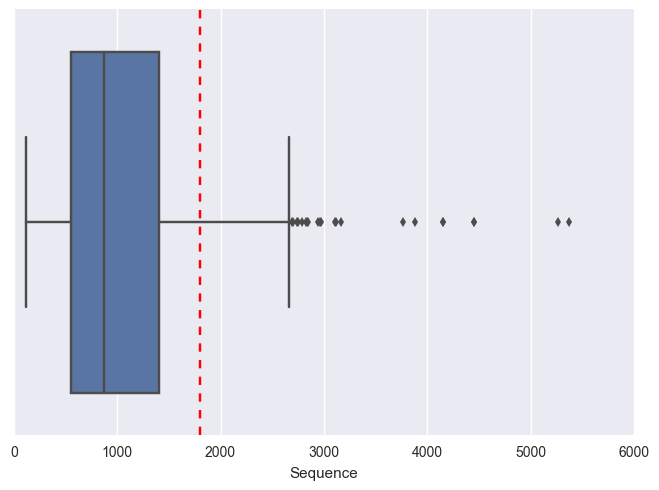

In [505]:
sns.boxplot(design_genes['Sequence'].str.len())
plt.axvline(x=1800, c='r', ls='--')

In [506]:
(design_genes['Sequence'].str.len() > 1800).sum()

62

So we have 65 genes too big to synthesize in one fragment.

In [507]:
(design_genes['Sequence'].str.len() < 300).sum()

37

And 37 too small

In [508]:
design_genes[design_genes['Sequence'].str.len() < 300]

,Gene,Sequence,ProteinSequence
8,MMSYN1_0774,aATGATCAATTTACTGGCCTCGACAACGAAGCTGGCGCAGCAATTG...,MINLLASTTKLAQQLILGFEIFIFIIAFIMIAIGLLQNKQSQTGLS...
13,MMSYN1_0658,aATGGCAAAGAAATCCTTGAAAGTCAAACAGGCCAAACACCAAAAA...,MAKKSLKVKQAKHQKFNVRNYTRCNHCGRPHAVLKKFGICRLCFRK...
17,MMSYN1_0694,aATGGCAAAATTTAGTGCTATCATTACTGATAAGGTTGGGCTTCAT...,MAKFSAIITDKVGLHARPASVLAKEASKFSSHITIMAGEKQGNLKS...
35,MMSYN1_0648,aATGAAGGTACGTTCATCTGTAAAGCAGATTTGTGATAAGTGCCGT...,MKVRSSVKQICDKCRVIRRKGRVMIICVTPKHKQRQG
39,MMSYN1_0105,aATGTCAAACAAGAGTAAAAGTTACGATGAATTGATCTCTGAGATT...,MSNKSKSYDELISEIKEDTKKLSSNEISVEQAMEIFEQNIEKIKLA...
56,MMSYN1_0499,aATGCGTTTTTTGCTTGGACTTCAGTATTTTGCGTCGAAGAAGGGC...,MRFLLGLQYFASKKGVGSTKNGRDSESKRLGAKKSDGQFTNAGSII...
79,MMSYN1_0422,aATGGCACGCCGCGACGCATTAACAGGTAAAAGTGCCTTGTCTGGA...,MARRDALTGKSALSGQSRSHALNATKRKWNLNLQKVRVMDENGSVF...
108,MMSYN1_0649,aATGGCGAAGGAAACCGAGATGGAGTTTGAAGGCACAGTTGTAGAG...,MAKETEMEFEGTVVEVLPNAQFKVKLENGVVINAHVSGKIRMHYIR...
122,MMSYN1_0362,aATGGTTAAGTTACGCCTGAAACGTATTGGCAAAAAGCAAGCACCA...,MVKLRLKRIGKKQAPFYRIVAADSRINRNGQYIELVGTFNPLKDEV...
128,MMSYN1_0689,aATGTCGAACCGTTTTAATAAAGAGTTCTGGAAGGAGTTGGCTCAT...,MSNRFNKEFWKELAHDFMFELNDEELENLMSVEDKLFDDFKKITSI...


# Break up big genes into assemblable chunks

In [509]:
for i in np.arange(1,5)*1780:
    print(i, (design_genes['Sequence'].str.len() >= i).sum())

1780 64
3560 8
5340 1
7120 0


We're going to divide the genes that are bigger than 1800 bp in half, and those bigger than 3600 into thirds. We'll store the new sequences in a dataframe of actual fragments to synthesize. Nice future project: generalize this for arbitrary sizes.

**Note**: We use sizes slightly smaller than 1800/3600 to compensate for the addition of 2 bp of overlap on each fragment and the size of the prefix/suffix.

In [510]:
def fragment_gene(seq):
    max_len = 1800-2-len(prefix)-len(suffix)
    num_frags = len(seq) // max_len + 1
    frag_len = len(seq) // num_frags

    print(max_len, num_frags, frag_len)

    frags = []
    for i in range(num_frags):
        frag = seq[max(0, i * frag_len - 2):min((i+1) * frag_len + 2,len(seq))]
        frag = prefix + frag + suffix
        frags.append(frag)
    
    return frags
     
fragments = pd.DataFrame({
            'Gene': [],
            'Fragment': [],
            'Sequence': []
        })

for i, gene in design_genes.iterrows():
    frags = fragment_gene(gene['Sequence'])
    fragments = fragments.append(
        pd.DataFrame({
            'Gene': [gene['Gene']] * len(frags),
            'Fragment': range(1,len(frags)+1),
            'Sequence': frags
        }), ignore_index=True)

1782 1 1130
1782 1 944
1782 1 1724
1782 1 761
1782 1 416
1782 1 740
1782 1 485
1782 1 923
1782 1 287
1782 1 446
1782 1 1100
1782 1 497
1782 1 1193
1782 1 188
1782 1 632
1782 1 1328
1782 2 1072
1782 1 272
1782 1 908
1782 1 941
1782 1 803
1782 1 842
1782 1 1310
1782 1 1013
1782 1 1583
1782 1 548
1782 1 1304
1782 1 329
1782 1 386
1782 1 764
1782 1 1247
1782 1 338
1782 1 308
1782 1 362
1782 1 1367
1782 1 116
1782 1 443
1782 3 1292
1782 1 1001
1782 1 218
1782 1 644
1782 2 917
1782 1 662
1782 1 1319
1782 1 440
1782 2 1085
1782 2 1369
1782 1 1130
1782 1 401
1782 1 629
1782 1 704
1782 1 866
1782 2 1253
1782 1 1667
1782 1 971
1782 1 854
1782 1 284
1782 1 1190
1782 1 353
1782 2 932
1782 1 1580
1782 1 497
1782 1 749
1782 1 1019
1782 2 1000
1782 2 1193
1782 1 563
1782 1 1244
1782 1 515
1782 1 599
1782 1 419
1782 2 953
1782 1 743
1782 1 1373
1782 1 812
1782 1 548
1782 1 557
1782 1 551
1782 1 935
1782 1 200
1782 1 311
1782 1 851
1782 1 305
1782 1 881
1782 1 1022
1782 1 845
1782 1 1442
1782 1 671
178

In [511]:
fragments

,Fragment,Gene,Sequence
0,1.0,MMSYN1_0002,gaagacataATGAACTTCTCTATTAATCGTATGGTTTTGTTAGATA...
1,1.0,MMSYN1_0821,gaagacataATGGAGAAGTTCACTATCAAGGATTTAACGGACAACT...
2,1.0,MMSYN1_0233,gaagacataATGTCGAAACAAATCAAAGGAATTGCTGCATCTGATG...
3,1.0,MMSYN1_0329,gaagacataATGTCGCTGGAGCGTTTGCAAAAGGTAATCAGTAGCC...
4,1.0,MMSYN1_0027,gaagacataATGATTAAAAAGTATGAGGTGATGTATATTTTGGATC...
5,1.0,MMSYN1_0378,gaagacataATGCAGACCAACCTGAAACAGTATCTGGATTATCTGG...
6,1.0,MMSYN1_0515,gaagacataATGTCAAAACGCCTTGATTATCTTAGCTGGCAACATT...
7,1.0,MMSYN1_0114,gaagacataATGAGTAATAAGAAGTTGTGTACCATTATCATTCCAT...
8,1.0,MMSYN1_0774,gaagacataATGATCAATTTACTGGCCTCGACAACGAAGCTGGCGC...
9,1.0,MMSYN1_0800,gaagacataATGTCGAACCGCATTTACATTGGTAATGACCATTCGG...


# More stats

In [512]:
# How much DNA are we going to synthesize?
fragments['Sequence'].str.len().sum()

478670

# Validation

In [513]:
validation = []

for i, gene in fragments.groupby('Gene'):
    frags = []
    for seq in gene['Sequence'].str.upper():
        # Virtual digest using BbsI
        seq = seq[seq.find('GAAGAC')+8:]
        seq = seq[:seq.find('GTCTTC')-2]
        frags.append(seq)
            
    # Now we have a list of 'digested' fragments; assemble them based on overlaps.
    while len(frags) > 1:
        frag = frags.pop(0)
        for other in frags:
            if other[-4:] == frag[:4]:
                frag = other[:-4] + frag
                frags.remove(other)
                break
        frags.append(frag)
                    
    # Add assembled full sequence to the validation database
    # Remove the first and last nucleotides to get the CDS instead of MoClo adapters
    validation.append({'Gene': gene['Gene'].iloc[0], 'Sequence': frags[0][1:-1]})
    
validation_dna = pd.DataFrame(validation)

In [514]:
validation_dna = pd.merge(validation_dna, syn3_genes.ix[:, ['Locus', 'ProteinSequence']], left_on="Gene", right_on="Locus")

In [515]:
validation_dna['Translated'] = validation_dna['Sequence'].apply(lambda x: translate(x)[:-1])
broken = validation_dna[validation_dna['Translated'] != validation_dna['ProteinSequence'].str.replace('\s+', '')]

for i, gene in broken.iterrows():
    print(gene['Gene'])
    print(gene['ProteinSequence'])
    print(gene['Translated'])
    print()

MMSYN1_0262
MKKYIIAPSVLSANFMELKNELELCKKNNINWIHYDVMDFDFVPNLTFGSKILHDIKKNIDINVDVHFMVSVKTKQFEDFFSDYIKAKPEMMTMHIESLKDDNTINKFIDLCKQNNILASLAISPKTDVSLVYPYLDKLDNVLVMSVEPGFGGQKFISSSLEKIQILDQLRNTKNYKYTIEVDGGINEQTSVLVKQAGVDMIVAGSYLFGSDDFTKRAKGLFDEL-NYFNCYCKN-FKPWNF-QRFNLCYWCWKK
MKKYIIAPSVLSANFMELKNELELCKKNNINWIHYDVMDFDFVPNLTFGSKILHDIKKNIDINVDVHFMVSVKTKQFEDFFSDYIKAKPEMMTMHIESLKDDNTINKFIDLCKQNNILASLAISPKTDVSLVYPYLDKLDNVLVMSVEPGFGGQKFISSSLEKIQILDQLRNTKNYKYTIEVDGGINEQTSVLVKQAGVDMIVAGSYLFGSDDFTKRAKGLFDE



This one is broken because of the sequence in the database, so we're good!

# Output into Twist-acceptable format

In [537]:
twist_dna = pd.DataFrame({
        'Sequence ID': fragments['Gene'] + "_" + fragments['Fragment'].astype(np.int).astype(np.str),
        'Sequence Description': [''] * fragments.shape[0],
        'Insert Sequence': fragments['Sequence'],
        'Output Format': 'linear',
        'Vessel Type': '96 well'
        }, columns=['Sequence ID', 'Sequence Description', 'Insert Sequence', 'Output Format', 'Vessel Type'])

twist_dna.to_excel('./twist-order.xlsx')